In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load tokens
import sentencepiece as spm
sp = spm.SentencePieceProcessor(model_file='../../inputs/embd/sentencepiece_bpe.model')

# load dataset
df_filename = "../../inputs/preprocessed_jsons/embedding_train.json"
dataset = pd.read_json(df_filename)

X = dataset.tokens.values
X = np.array(list(X)).reshape((-1, 600))

y = np.array(dataset.username)

In [2]:
def get_example_of_index(author_index: int, n_files: int):
    index = np.where(y==author_index)[0]
    print("Author {}".format(author_index))
    for i in range(min(n_files, index.shape[0])):
        for n in X[index[i]]:
            print(sp.decode(int(n)), sep="", end="")
        print()

# take the median value of the value_counts

In [3]:
# take: 34, 23, 39, 53, 40, 60 (60 is usual)
# - 3 - unusual file start ("""class"""....)
# +-10 - start with #usage
# +18, - start with #!usr/bin/python + if __name=='__main__'
# +34 - start with #!usr/bin/python + main method
# -36 (stubborn),
# +40 - usr/bin/python only
# +23 - main() function, which wraps everything
# -31, -50 - if __name=='__main__'
# - 32 - created on with author specification, long comments, main, really specific person
# +!39, -45 - created on + no main
# +!51 - #-*-coding:UTF-8
# - :( 48 - with and __main__
# - 49 - long comments, on all the line
# !53 - sys.exit(main)
get_example_of_index(60, 10)
get_example_of_index(34, 10)
get_example_of_index(23, 10)
get_example_of_index(39, 10)
get_example_of_index(53, 10)
get_example_of_index(40, 10)

Author 60
importsys#fromhttp://codereview.stackexchange.com/questions/47984/fractions-data-type-when-to-reducedefgcd(x,y):whiley:x,y=y,x%yreturnxdefreduce(x,y):cancel_factor=gcd(x,y)return(x/cancel_factor,y/cancel_factor)powers=[]foriinxrange(1,41):powers.append(pow(2,i))#printlen(powers)x=[]foriinxrange(0,40):x.append(1.0/powers[i])#printxnumCases=input()forcaseinrange(1,numCases+1):n,d=[int(y)foryinraw_input().split('/')]f=float(n)/float(d)n2,d2=reduce(n,d)#print"reduced"#printn2,d2gen=0ifd2inpowers:while(f<x[gen]andgen<40):gen+=1output=gen+1else:output="impossible"#printgenprint'Case#'+str(case)+':'+str(output)
importsysdefis_sym(number):num_str=str(number)num_len=len(num_str)half_len=int(num_len/2)end=num_str[-half_len:]rev_end=end[::-1]start=num_str[:half_len]equal=rev_end==startreturnequalf=open('palindromes.out')numbers=[int(x)forxinf.read().split()]numCases=input()forcaseinrange(1,numCases+1):min,max=[int(x)forxinraw_input().split()]count=0fornumberinnumbers:ifmin<=numberandmax

The size of the dataset

In [4]:
selected_authors = [60, 34, 23, 39, 53, 40]
indexes = np.where(np.isin(y, selected_authors))[0]
print(indexes.shape)

(263,)


In [5]:
y_selected = y[indexes]
x_selected = X[indexes]

Result: 4 batches for 64

In [6]:
# saving
pf = pd.DataFrame()
pf["username"] = y_selected.T
pf["tokens"] = [ x for x in x_selected]

In [7]:

pf

,username,tokens
0,23,"[63.0, 2536.0, 586.0, 115.0, 5617.0, 57.0, 934..."
1,60,"[138.0, 1149.0, 46.0, 156.0, 1256.0, 676.0, 36..."
2,39,"[1157.0, 12716.0, 440.0, 2268.0, 96124.0, 946...."
3,53,"[3238.0, 2785.0, 96124.0, 1119.0, 96124.0, 137..."
4,39,"[1157.0, 12716.0, 440.0, 7210.0, 96124.0, 946...."
...,...,...
258,53,"[3238.0, 2785.0, 96124.0, 1119.0, 96124.0, 137..."
259,40,"[3238.0, 2785.0, 96124.0, 1119.0, 96124.0, 137..."
260,39,"[1157.0, 12716.0, 440.0, 2268.0, 96124.0, 946...."
261,60,"[63.0, 2142.0, 96077.0, 1150.0, 586.0, 1664.0,..."


In [8]:
pf.to_json("../../inputs/preprocessed_jsons/overfit.json")

In [9]:

np.unique(y_selected)

array([23, 34, 39, 40, 53, 60])

In [10]:
dataset = pd.read_json("../../inputs/preprocessed_jsons/overfit.json")

X = dataset.tokens.values
X = np.array(list(X)).reshape((-1, 600))
y = np.array(dataset.username)

In [11]:
np.unique(y)

array([23, 34, 39, 40, 53, 60])

In [19]:
dataset.username.value_counts()

40    53
53    50
34    46
60    43
39    37
23    34
Name: username, dtype: int64

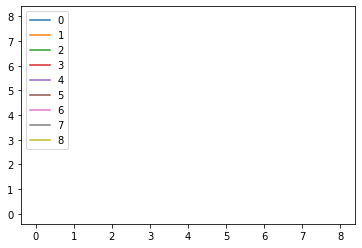

In [18]:

for i in range(9):
    plt.plot(i, i, label="{}".format(i))
plt.legend()